In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# split X_train and y_train, X_test and y_test
X_train_df = pd.read_csv('./X_train.csv')
X_test_df = pd.read_csv('./X_test.csv')
y_train_df = pd.read_csv('./y_train.csv', header = None)
y_test_df = pd.read_csv('./y_test.csv',header = None)

In [3]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df.values
y_test = y_test_df.values

In [4]:
rf_model = RandomForestRegressor(n_estimators = 100, max_depth = None)

In [5]:
rf_model.fit(X_train,y_train)

C:\Users\butte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
y_pred = rf_model.predict(X_test)

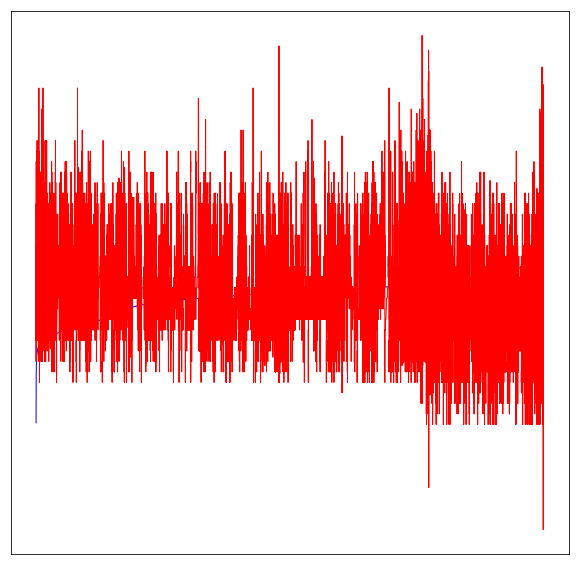

In [7]:
plt.figure(figsize=(10,10))

plt.plot(np.arange(len(y_pred)), np.sort(y_pred), color='blue', linewidth=1)
plt.plot(np.arange(len(y_test)), np.sort(y_test), color='red', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

### Import the GridSearch module to help us choose the best hyperparameter

In [8]:
from sklearn.model_selection import GridSearchCV
rfr_best = RandomForestRegressor()
params = {'n_estimators': range(50,100,200)}
gs = GridSearchCV(rfr_best, params, cv=10, scoring = 'r2')
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

C:\Users\butte\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\butte\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\butte\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\butte\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

0.2785357126343833
{'n_estimators': 50}


### Computes MSE, MAE, R2

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, mae, r2)

0.09532259981427707 0.23711234334091372 0.22447152611369436
